In [1]:
from EXPERIMENT_HYPER_EMPIRICAL import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from _HyperCommunityDetection import *
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

In [3]:
def scatter_spectral(eigvalue, fig=None, ax=None, title='Spectrum'):
    # Construct scatter coordinate
    x = []
    y = []
    for _w in eigvalue:
        _x = _w.real if isinstance(_w, complex) else _w
        _y = _w.imag if isinstance(_w, complex) else 0
        x.append(_x)
        y.append(_y)
    if fig is None and ax is None:
        fig = plt.figure(figsize=(8, 8))
        widths = [4]
        heights = [4]
        spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
        row = 0
        col = 0
        ax = fig.add_subplot(spec5[row, col])
    ax.scatter(x, y, s=6)
    ax.set_title(title)

In [28]:
def plot_spectral_NBBH(ehg):
    edge_order, edge_count = np.unique(ehg.H.sum(axis=0).flatten(), return_counts=True)
    order_count = dict(zip(edge_order, edge_count))
    print(order_count)
    ds = dict()
    for o in order_count:
        ds[o] = o * order_count[o] / ehg.n
    bulk = 0
    for k in ehg.Ks:
        bulk += ds[k] * (k - 1)
    bulk = np.sqrt(bulk)
    print(f'R={bulk}')
    
#     NB = ehg.get_operator(operator='NB')
#     print(np.shape(NB), NB.sum())
#     eig_B, _ = eig(NB.toarray())
    info_eig = [16]
#     for e in eig_B:
#         if abs(e) > d and e.imag == 0:
#             info_eig.append(e)
    print(info_eig)
    fig = plt.figure(figsize=(16, 8))
    widths = [5]
    heights = [5]
    spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
    row = 0
    col = 0
    ax = fig.add_subplot(spec5[row, col])
    plt.axis('equal')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data', 0))
#     scatter_spectral(eig_B, fig=fig, ax=ax, title="Spectrum of NB")
    ax.add_patch(Circle(xy = (0.0, 0.0), radius=bulk, alpha=0.2))
    
    bh_samples = 10
    c = gen_colors(start=colors_red[0], end=colors_green[0], n=bh_samples)
    i = 0
    eig_BHs = dict()
    for r in np.linspace(bulk, max(info_eig).real+1, bh_samples):
        BH = ehg.get_operator(operator='BH', r=r)
        eig_BH, _ = eig(BH.toarray())
        eig_BHs[r] = eig_BH
        x = []
        y = []
        for _w in eig_BH:
            _y = _w.real if isinstance(_w, complex) else _w
            x.append(r)
            y.append(_y)
        ax.scatter(x, y, s=1, c=c[i])
        i += 1
#     ax.set_ylim(-bulk, 2 *bulk)
#     x1, x2, y1, y2 = R, 10, -0.6, 0.05  # subregion of the original image
#     axins = ax.inset_axes(
#         [0.5, 0.6, 0.47, 0.37],
#         xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
#     sub_points_x = []
#     sub_points_y = []
#     sub_points_c = []
#     sub_points_s = []
#     i = 0
#     for r in eig_BHs.keys():
#         if x1 < r < x2:
#             for e in eig_BHs[r]:
#                 if y1 < e < y2:
#                     sub_points_x.append(r)
#                     sub_points_y.append(e)
#                     sub_points_c.append(c[i])
#                     sub_points_s.append(1)
#         i += 1
#     for _w in eig_B:
#         _x = _w.real if isinstance(_w, complex) else _w
#         _y = _w.imag if isinstance(_w, complex) else 0
#         if x1 < _x < x2 and y1 < _y < y2:
#             sub_points_x.append(_x)
#             sub_points_y.append(_y)
#             sub_points_c.append('blue')
#             sub_points_s.append(6)
#     axins.scatter(sub_points_x, sub_points_y, s=sub_points_s, c=sub_points_c)
#     axins.axhline(0, color='grey', lw=1, ls=':')
#     ax.indicate_inset_zoom(axins, edgecolor="black")

In [6]:
name = 'highschool'
ehg = EmpiricalHyperGraph(name, force=False)

Construct highschool hypergraph with 327 nodes, 7818 hyperedges and all possible k is [3, 4, 2, 5].


{2: 5498, 3: 2091, 4: 222, 5: 7}
R=8.97601288654654
[16]


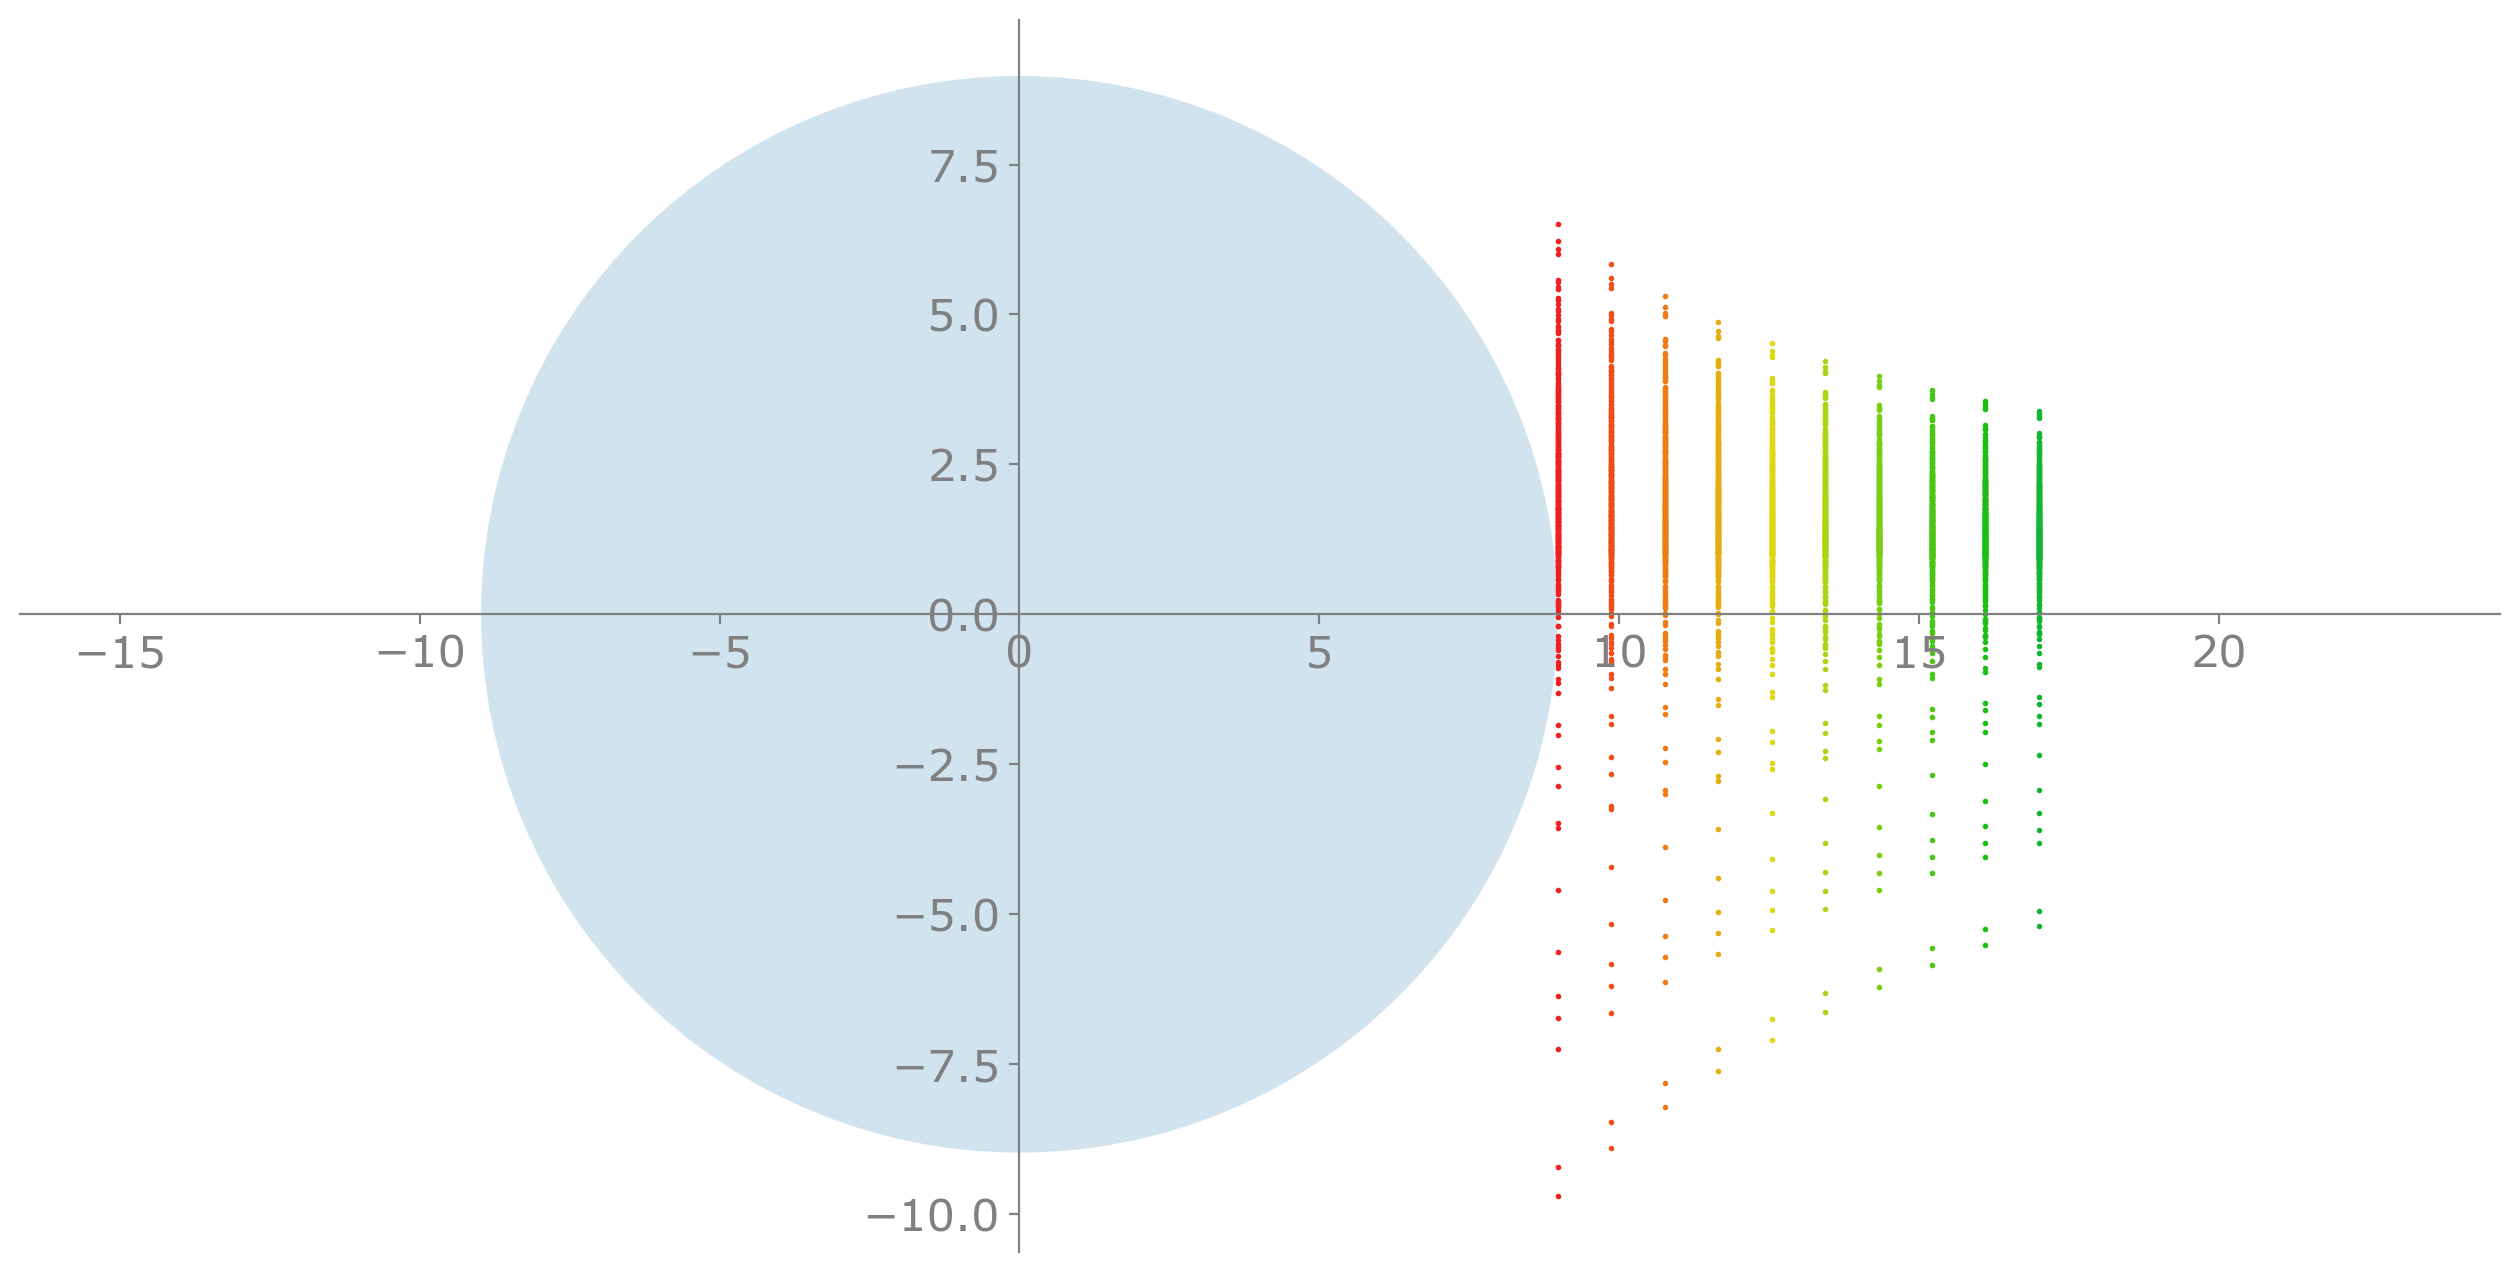

In [29]:
plot_spectral_NBBH(ehg)

Construct primary hypergraph with 242 nodes, 12704 hyperedges and all possible k is [2, 3, 4, 5].
{2: 7748, 3: 4600, 4: 347, 5: 9}
R=14.001180587766148
[16]


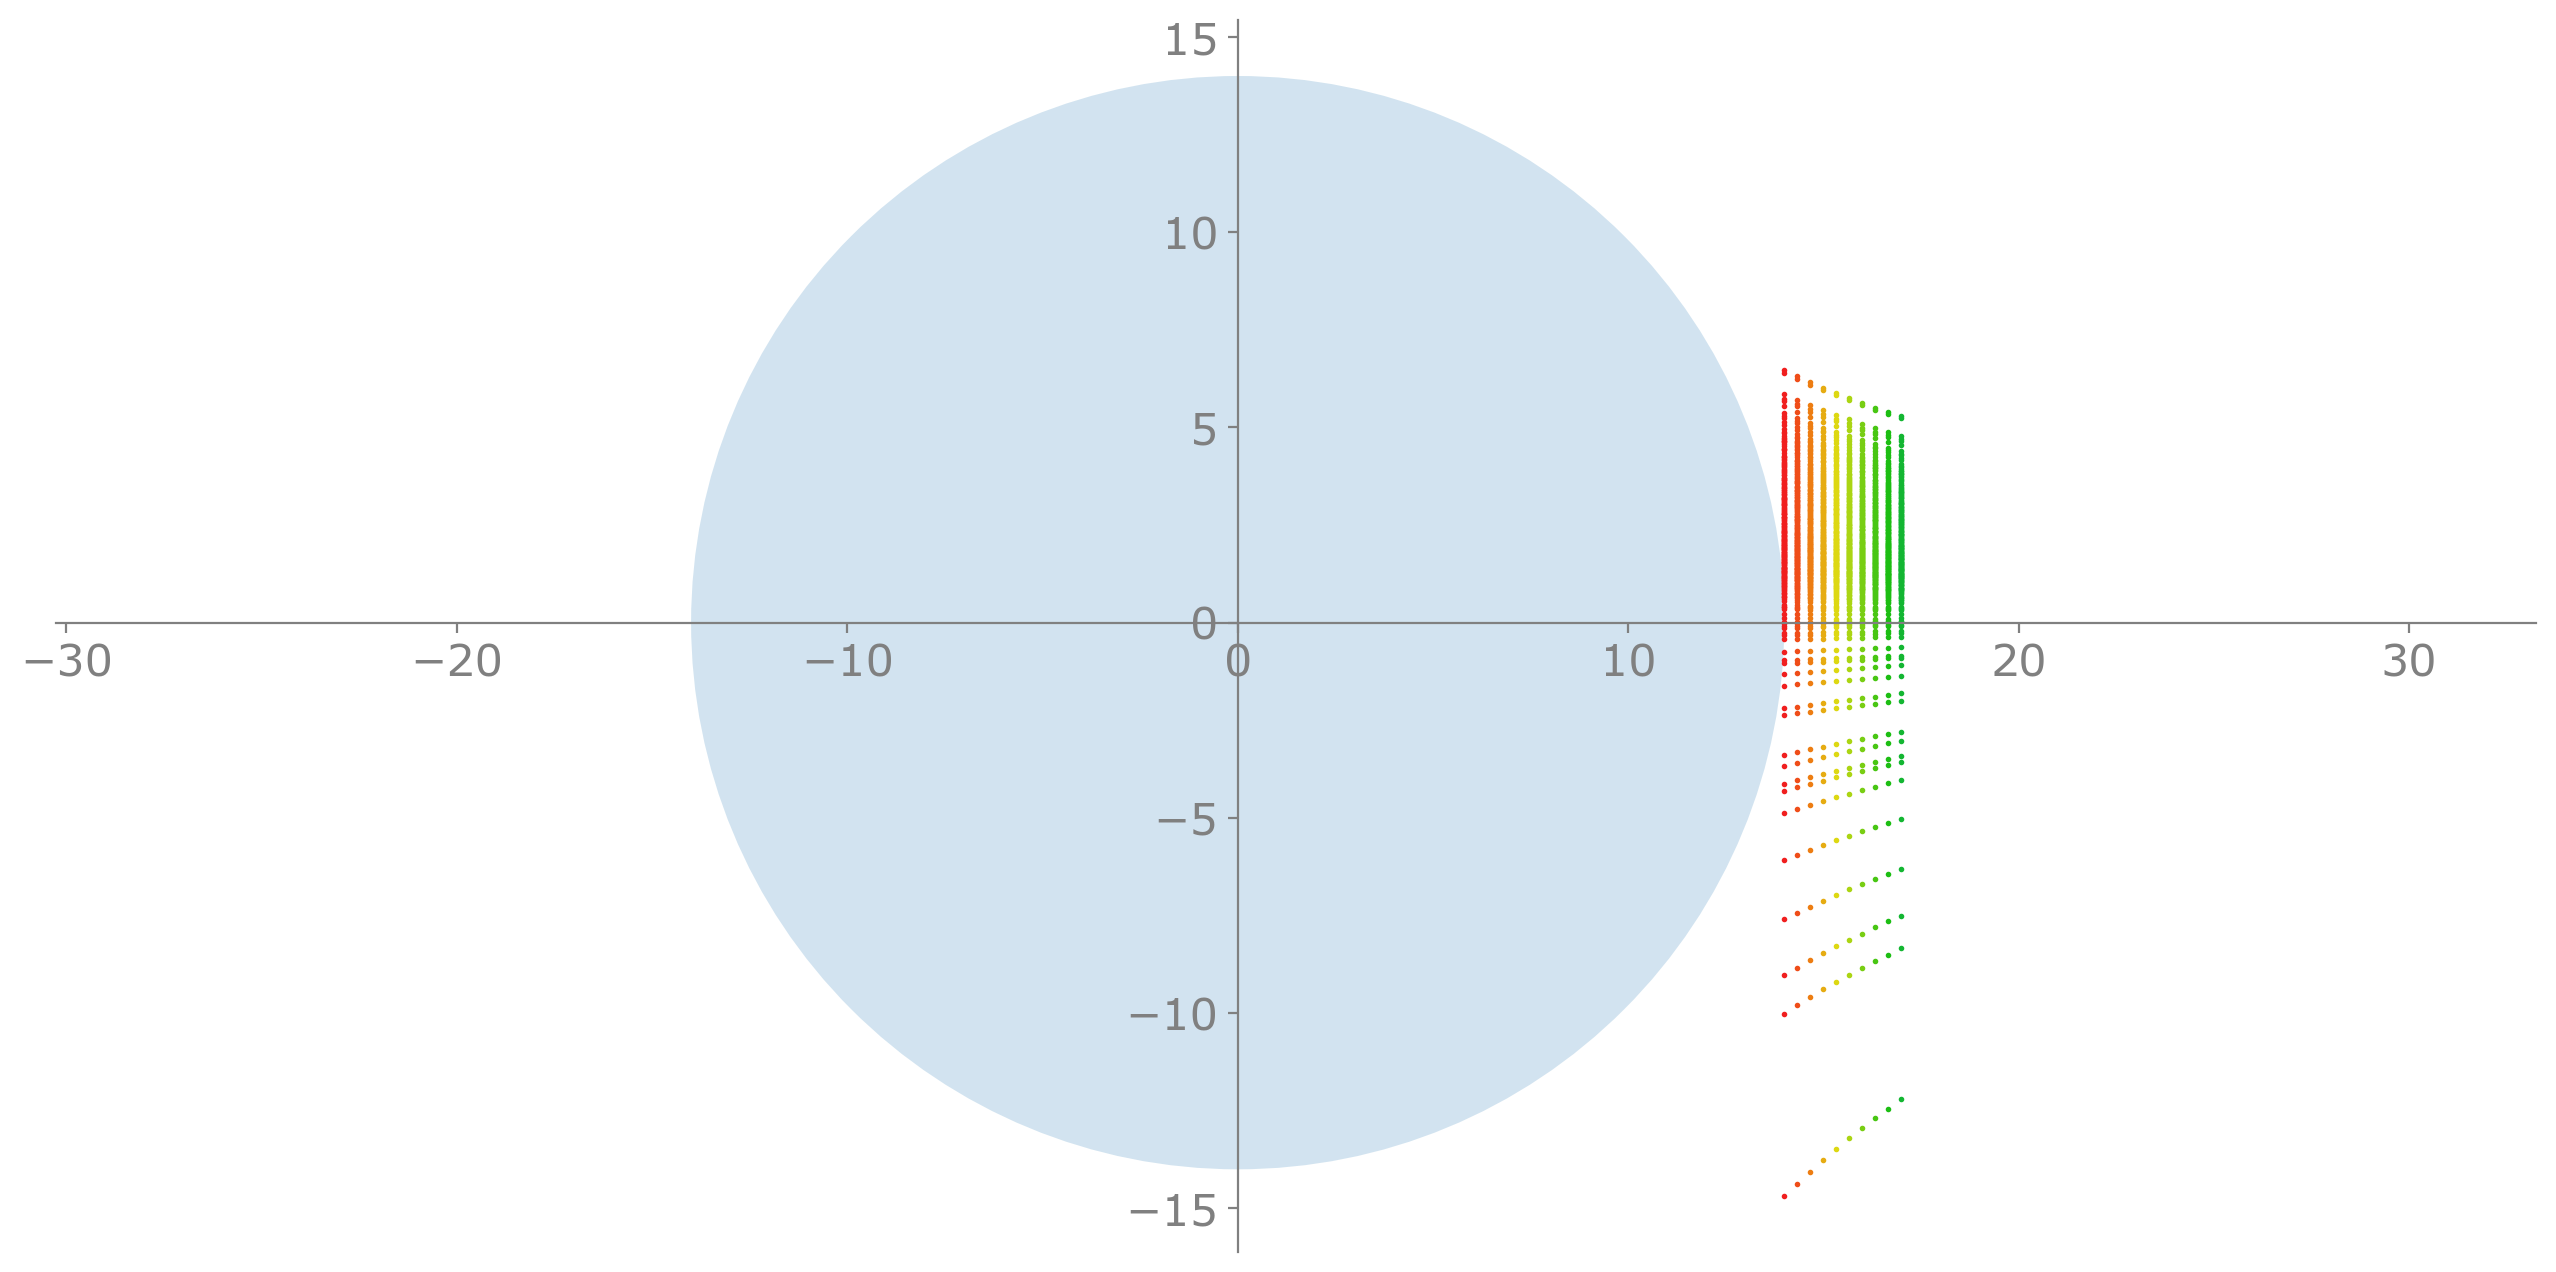

In [30]:
name = 'primary'
ehg = EmpiricalHyperGraph(name, force=False)
plot_spectral_NBBH(ehg)